# How would you address the issue of low resolution images?

Mounted at /content/drive
uint8
(363, 641, 3)
uint8
(363, 641)


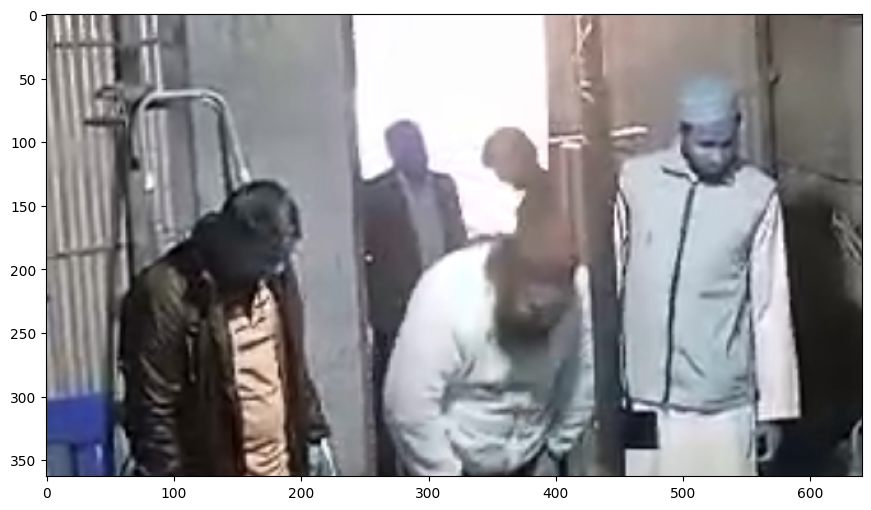

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')


# taking the image as input
image_path = '/content/drive/My Drive/Colab_Files/detection_&_recognition.png'
input_image = cv2.imread(image_path)
print(input_image.dtype)
print(input_image.shape)

img_gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
print(img_gray.dtype)
print(img_gray.shape)


# creating the contrast limitde adpative histogram equalization(clahe) object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# applying CLAHE
clahe_gray = clahe.apply(img_gray)
# output_file = 'clahe_enhanced.png'
# cv2.imwrite(output_file, clahe_gray)
# files.download(output_file)
# print(f"CLAHE enhanced image saved")

# Perform denoising, then smoothing , finally sharpening

bilateral_filtering = cv2.bilateralFilter(clahe_gray, 5, 50, 50)
output_file = 'bilateral_filter_orig.png'
cv2.imwrite(output_file, bilateral_filtering)
# files.download(output_file)

plt.figure(figsize=(12,6))
plt.imshow(input_image)

# plt.subplot(1,4,1), plt.gca().set_title('Original image'), plt.imshow(input_image)
# plt.subplot(1,4,2), plt.gca().set_title('Gray image'), plt.imshow(img_gray, cmap='gray')
# plt.subplot(1,4,3), plt.gca().set_title('CLAHE enhanced image'), plt.imshow(clahe_gray, cmap='gray')
# plt.subplot(1,4,4), plt.gca().set_title('Bilateral Filtered image'), plt.imshow(bilateral_filtering, cmap='gray')

(<Axes: title={'center': 'Tempered cool/bluish image'}>,
 Text(0.5, 1.0, 'Tempered cool/bluish image'),
 <matplotlib.image.AxesImage at 0x7d8cbd935ad0>)

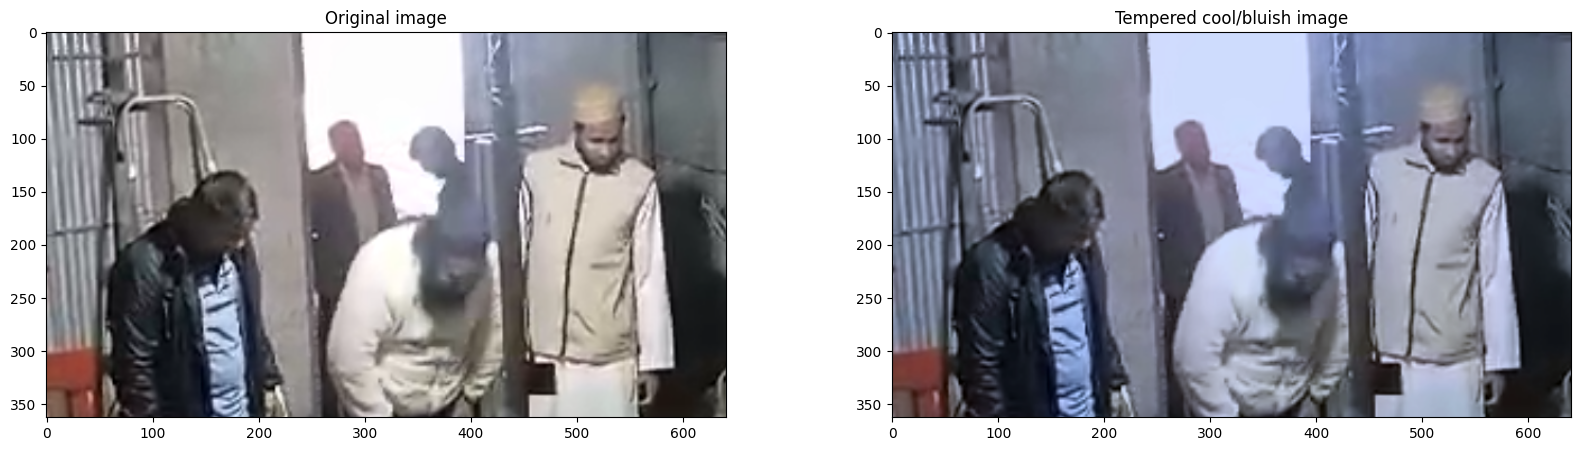

In [ ]:
# Reference of Kelvin to RGB mapping table: https://stackoverflow.com/questions/11884544/setting-color-temperature-for-a-given-image-like-in-photoshop/11888449#11888449
kelvin_table = {
    1000: (255, 56, 0),
    1500: (255, 109, 0),
    2000: (255, 137, 18),
    2500: (255, 161, 72),
    3000: (255, 180, 107),
    3500: (255, 196, 137),
    4000: (255, 209, 163),
    4500: (255, 219, 186),
    5000: (255, 228, 206),
    5500: (255, 236, 224),
    6000: (255, 243, 239),
    6500: (255, 249, 253),
    7000: (245, 243, 255),
    7500: (235, 238, 255),
    8000: (227, 233, 255),
    8500: (220, 229, 255),
    9000: (214, 225, 255),
    9500: (208, 222, 255),
    10000: (204, 219, 255)
}

temperature_cool = 9500

input_image = Image.open(image_path)

# The image mode  should be RGB
if input_image.mode != "RGB":
        input_image = input_image.convert("RGB")

# The cool color temperature parameter is passed in the kelvin_table dictionary to get the red, green and blue channel values for scaling
r_1, g_1, b_1 = kelvin_table[temperature_cool]

# Matrix to compute the cool values of red, green and blue channels
matrix_cool = (
        r_1 / 255.0, 0.0, 0.0, 0.0,
        0.0, g_1 / 255.0, 0.0, 0.0,
        0.0, 0.0, b_1 / 255.0, 0.0
    )

# The input image is converted into a new cool image using the scaling parameters saved in matrix_cool
tempered_image_cool = input_image.convert('RGB', matrix_cool)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1), plt.gca().set_title('Original image'), plt.imshow(input_image)
plt.subplot(1,2,2), plt.gca().set_title('Tempered cool/bluish image'), plt.imshow(tempered_image_cool)

<PIL.Image.Image image mode=RGB size=641x363 at 0x7D8CBD8A3ED0>


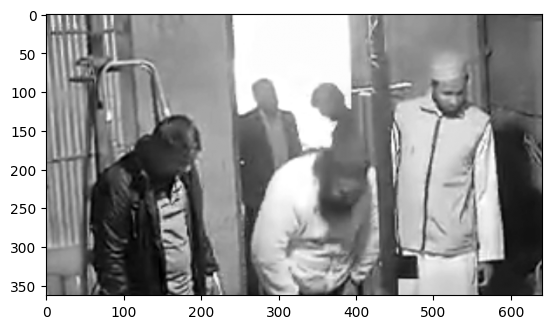

In [ ]:
from PIL import Image
print(tempered_image_cool)
im1 = tempered_image_cool.split()
plt.imshow(im1[0], cmap='gray')
im1 = im1[0]

In [ ]:
plt.imshow(im1[1], cmap='gray')

TypeError: 'Image' object is not subscriptable

In [ ]:
plt.imshow(im1[2], cmap='gray')

TypeError: 'Image' object is not subscriptable

In [ ]:
import cv2
# creating the contrast limitde adpative histogram equalization(clahe) object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# applying CLAHE
clahe_gray = clahe.apply(im1[1])
plt.figure(figsize=(20,6))
plt.imshow(clahe_gray, cmap='gray'), plt.gca().set_title('CLAHE enhanced image')

error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'apply'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


(<matplotlib.image.AxesImage at 0x7d8ca4194250>,
 Text(0.5, 1.0, 'Gaussian blurred input image'))

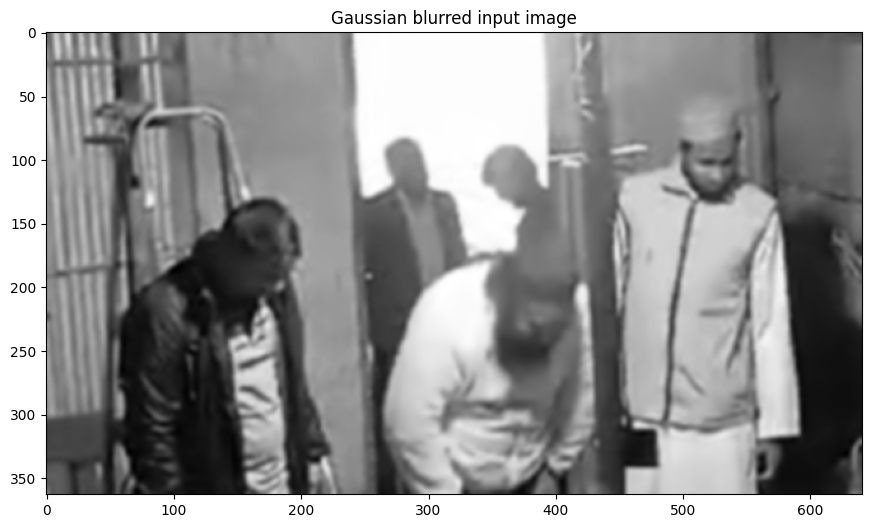

In [ ]:
plt.figure(figsize=(20,6))
Gaussian = cv2.GaussianBlur(img_gray, (7, 7), 0)
plt.imshow(Gaussian, cmap='gray'), plt.gca().set_title('Gaussian blurred input image')

(<matplotlib.image.AxesImage at 0x7941c32c3690>,
 Text(0.5, 1.0, 'Median blurred input image'))

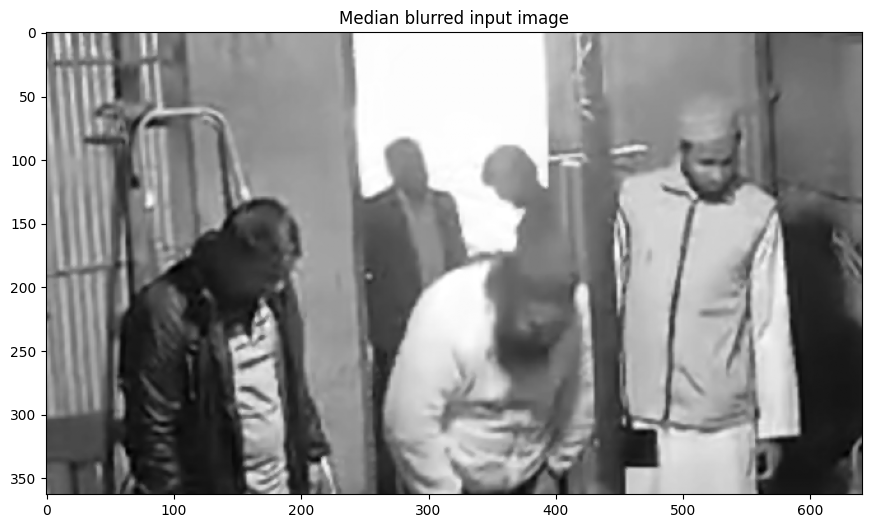

In [ ]:
median = cv2.medianBlur(img_gray, 3)
plt.figure(figsize=(20,6))
plt.imshow(median, cmap='gray'), plt.gca().set_title('Median blurred input image')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(<matplotlib.image.AxesImage at 0x7e2ff559bf50>,
 Text(0.5, 1.0, 'combined RGB image'))

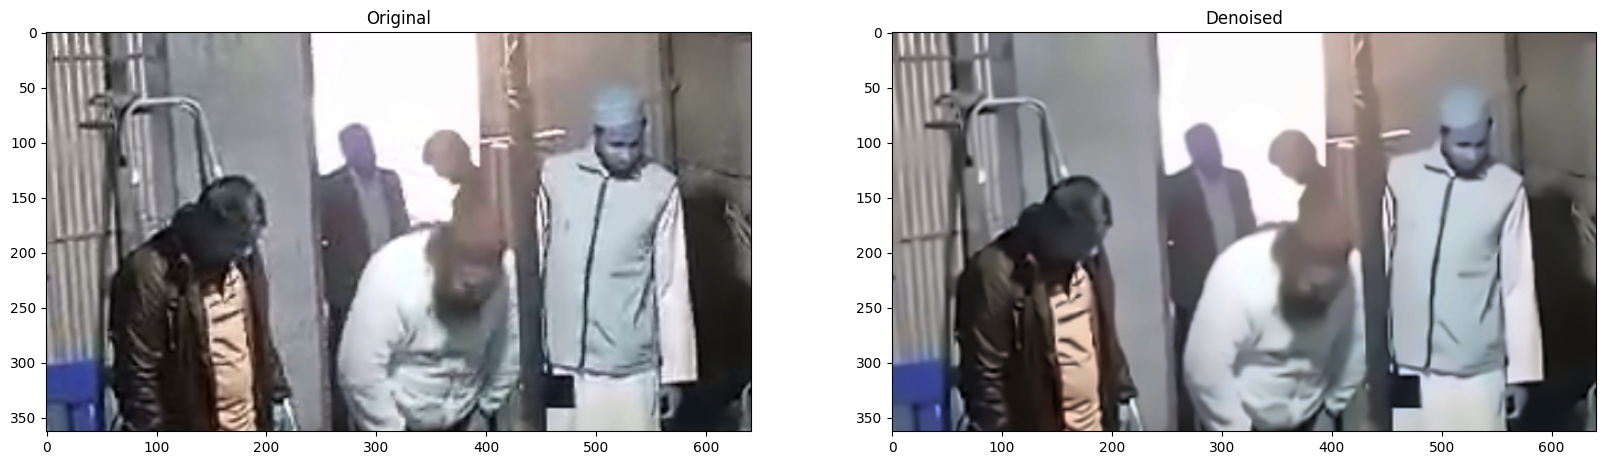

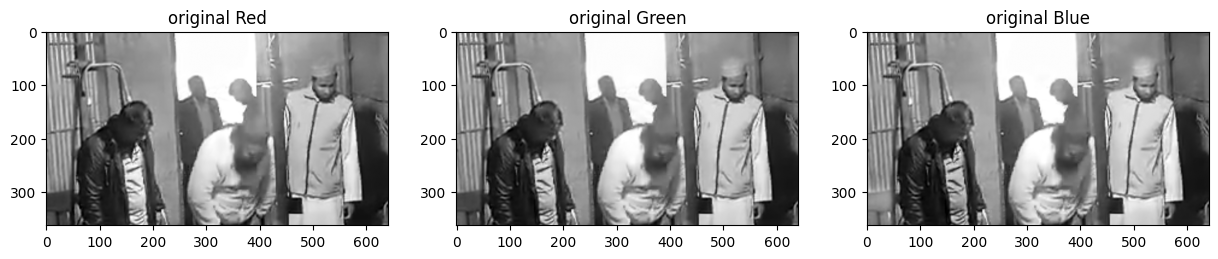

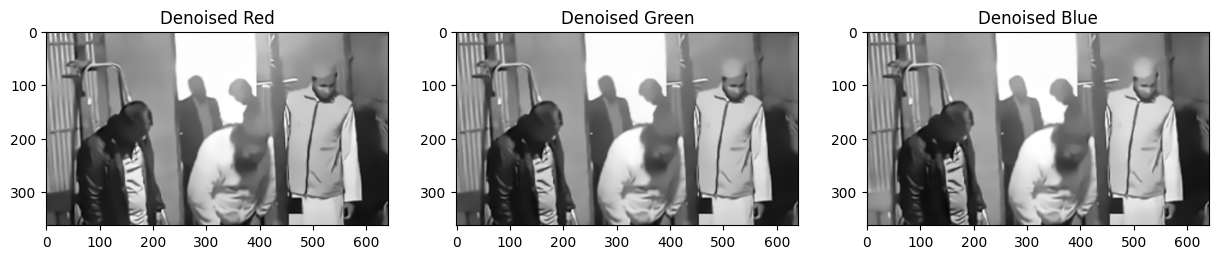

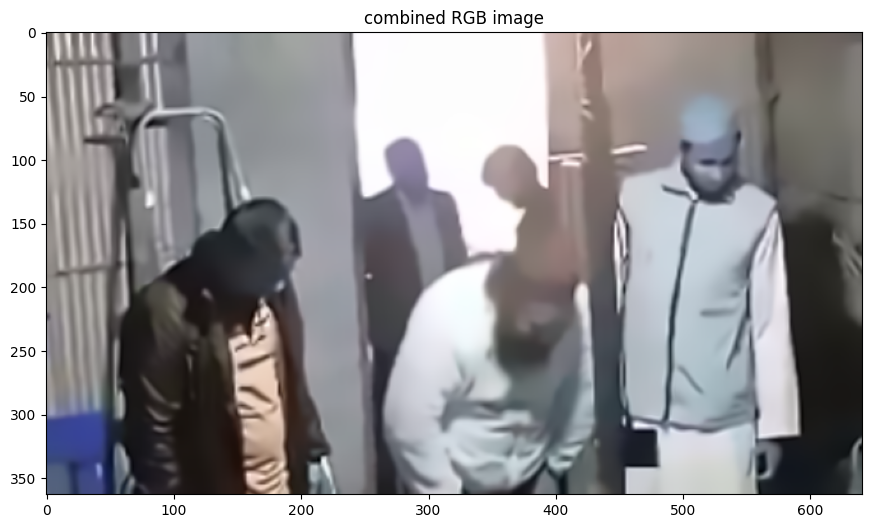

In [26]:
# Non local means denoising algorithm
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import convolve2d as conv2
from skimage import restoration
from google.colab import files
import os
from skimage import color, restoration
from google.colab import drive
drive.mount('/content/drive')

# Load image
image_path = '/content/drive/My Drive/Colab_Files/detection_&_recognition.png'
input_image = cv2.imread(image_path)
image = input_image
#image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
# Load a noisy image
# noisy_image = cv2.imread(‘path_to_noisy_image.jpg’)

# Apply non-local means denoising
denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].imshow(image); ax[0].set_title("Original")
ax[1].imshow(denoised_image); ax[1].set_title("Denoised")

red, green, blue = cv2.split(image)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(red); ax[0].set_title("original Red")
ax[1].imshow(green); ax[1].set_title("original Green")
ax[2].imshow(blue); ax[2].set_title("original Blue")

red_d = cv2.fastNlMeansDenoising(red, None, 15, 7, 21)
green_d = cv2.fastNlMeansDenoising(green, None, 15, 7, 21)
blue_d = cv2.fastNlMeansDenoising(blue, None, 15, 7, 21)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(red_d); ax[0].set_title("Denoised Red")
ax[1].imshow(green_d); ax[1].set_title("Denoised Green")
ax[2].imshow(blue_d); ax[2].set_title("Denoised Blue")
combined_rgb = cv2.merge([red_d, green_d, blue_d])

plt.figure(figsize=(20,6))
plt.imshow(combined_rgb), plt.gca().set_title('combined RGB image')

# How would you address the issue of challenging lighting conditions in the image?

In [ ]:
# CLAHE, white patch retinex algorithm